<a href="https://colab.research.google.com/github/shirinshaik/Heart-Disease-Prediction-Project/blob/main/Heart_Disease_Prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***End-to-End Implementation of Heart Disease Prediction using Machine Learning in Python***

The **Heart Disease Prediction project** is one of the most popular Python healthcare projects. This project seeks to contribute to the detection of the occurrence and potential risk of heart attacks, coronary artery disease, and other cardiovascular disorders. Using the UCI Heart Disease dataset, which has 14 columns and more than 300 samples, one can try out how well various prediction models work.

Additionally, one can conduct exploratory data analysis (EDA) on the data using the Pandas library. You will observe that K-nearest neighbors perform the best on the UCI dataset after experimenting with five machine learning models to predict heart disease.

First, we must load Python's necessary libraries crucial for data science. We use Sci-kit Learn to implement the k neighbors classifier, SVM, Random Forest, and Decision Tree. Implementations from sci-kit learn are well optimized with the option for hyperparameter tuning. It also lets you perform a Grid Search to find the best set of hyperparameters for a model. The search is performed using the RandomizedSearchCV module in Sklearn.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

Next, we load the dataset CSV file using Pandas. The Pandas package efficiently loads and access large datasets directly from an external file and performs data processing, feature engineering, and data analysis. In our case, we will use the read_csv function to load our file. The last line in the code above will list the columns, datatype, and the number of values, as shown below.

In [12]:
dataset = pd.read_csv("/content/heart.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Before moving, we must perform exploratory data analysis (EDA) on the dataset we just loaded. Looking at the description of the columns on Kaggle, we can infer that some of them are categorical variables. The basics of feature engineering and data science tell us that such columns need to be encoded to avoid unintentional bias.

For example, as shown below, columns like chest pain (cp), thal, and ca need to be one-hot encoded in addition to others.

In [13]:
print(np.unique(dataset[['cp']].values))
print(np.unique(dataset[['thal']].values))
print(np.unique(dataset[['ca']].values))

[0 1 2 3]
[0 1 2 3]
[0 1 2 3 4]


Moreover, the columns of age, cholesterol (chol), Rest BP (trestbps), thalach, and oldpeak need to be normalized.

We achieve these tasks using Pandas and the StandardScaler module from sklearn.

In [ ]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In addition to that, we must also perform a check for missing values and make sure we have a numeric target variable.

So, this is what the dataset looked like initially -- several categorical variables and unnormalized numeric values.

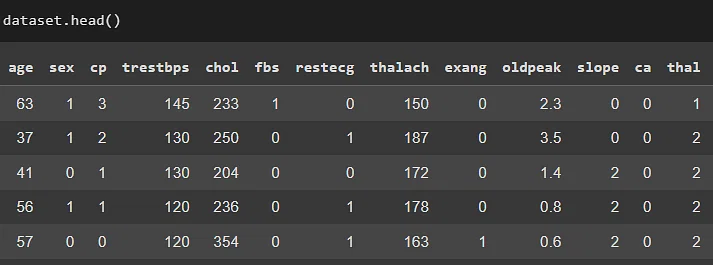

And below, we see a limited subset of the attributes we encoded and scaled. For instance, the chest pain data variable expanded into cp_0, cp_1, cp_2, and cp_3. This normalized and engineered dataset will be appropriate for training.

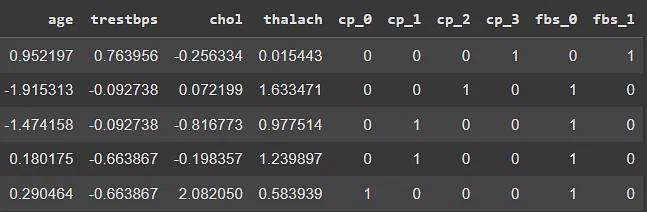

Next, we use the train_test_split function from sklearn to create a train and a testing subset of the ratio 80 to 20.

In [28]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 42)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (242, 30)
Shape of y_train: (242,)
Shape of X_test: (61, 30)
Shape of y_test: (61,)


# **Training Various Machine Learning Models for Heart Disease Detection**

Now we can start training and testing various ML models and compare their performance. For each model, we will change certain hyperparameters to check their performance before choosing the best set of hyperparameters for the final choice. There are several ways to do it, and we will try out some of them.

# **K Neighbors Classifier (KNN)**

Using the KNeighborsClassifier module from sklearn, we build a KNN model and iteratively tune the hyperparameter n_neighbors (number of neighbours to be checked for every data point).

In [21]:
knn_scores = []
for k in range(1,40):
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  knn_classifier.fit(X_train, y_train)
  knn_scores.append(knn_classifier.score(X_test, y_test))
print(f'Best Choice of k: {np.argmax(knn_scores)+1}')

Best Choice of k: 8


We see that the best choice of n_neighbors is 8, and the accuracy of this model is around 91.8%

In [22]:
k=8
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
print(f'Accuracy: {np.sum(y_pred==y_test)/len(y_test)}')

Accuracy: 0.9180327868852459


As we noted earlier, the K neighbors classifier is very efficient and would be pretty helpful our smaller and simpler dataset. With around 300 samples and binary classification, KNN was robustly able to distinguish between the two classes and performs well on speed and accuracy.


# **Support Vector Machines (SVM)**

The svm.SVC function in sklearn has several hyperparameters. We explore the primary ones: choice of kernel, regularization, and degree of the polynomial kernel.

In [30]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for i in range(len(kernels)):
    svc_scores_c = []

    for ch in range(1, 11):
        if kernels[i] == 'poly':
            svc_scores_poly = []

            for d in range(3, 10):
                svc_classifier = SVC(kernel=kernels[i], C=ch, degree=d)
                print(f'Training model with kernel: {kernels[i]}, C: {ch}, degree: {d}')  # Debug statement
                svc_classifier.fit(X_train, y_train)
                score = svc_classifier.score(X_test, y_test)
                print(f'Score for model with kernel {kernels[i]}, C: {ch}, degree: {d}: {score}')  # Debug statement
                svc_scores_poly.append(score)
            print(f'Best polynomial score: {np.argmax(svc_scores_poly) + 3}')
            svc_scores_c.append(svc_scores_poly[np.argmax(svc_scores_poly)])
        else:
            svc_classifier = SVC(kernel=kernels[i], C=ch)
            print(f'Training model with kernel: {kernels[i]}, C: {ch}')  # Debug statement
            svc_classifier.fit(X_train, y_train)
            score = svc_classifier.score(X_test, y_test)
            print(f'Score for model with kernel {kernels[i]}, C: {ch}: {score}')  # Debug statement
            svc_scores_c.append(score)

    print(f'Best choice of c for {kernels[i]}: {np.argmax(svc_scores_c) + 1}')
    svc_scores_c.append(svc_scores_c[np.argmax(svc_scores_c)])



Training model with kernel: linear, C: 1
Score for model with kernel linear, C: 1: 0.8688524590163934
Training model with kernel: linear, C: 2
Score for model with kernel linear, C: 2: 0.8688524590163934
Training model with kernel: linear, C: 3
Score for model with kernel linear, C: 3: 0.8688524590163934
Training model with kernel: linear, C: 4
Score for model with kernel linear, C: 4: 0.8688524590163934
Training model with kernel: linear, C: 5
Score for model with kernel linear, C: 5: 0.8688524590163934
Training model with kernel: linear, C: 6
Score for model with kernel linear, C: 6: 0.8524590163934426
Training model with kernel: linear, C: 7
Score for model with kernel linear, C: 7: 0.8524590163934426
Training model with kernel: linear, C: 8
Score for model with kernel linear, C: 8: 0.8688524590163934
Training model with kernel: linear, C: 9
Score for model with kernel linear, C: 9: 0.8360655737704918
Training model with kernel: linear, C: 10
Score for model with kernel linear, C: 1

In this step, we trained and evaluated Support Vector Machine (SVM) models using different kernel types and hyperparameters to classify the heart disease dataset.

 **Analysis:**

 Best choice of c for linear: 1

 Best polynomial score: 5

...

Training model with kernel: rbf, C: 1

Score for model with kernel rbf, C: 1: 0.9016393442622951

...

Training model with kernel: sigmoid, C: 1

Score for model with kernel sigmoid, C: 1: 0.8852459016393442

...



*   The SVM models were trained and evaluated for different kernel types (linear, polynomial, rbf, sigmoid) and hyperparameters (C values, degree for polynomial kernel).
*  The best-performing model had an RBF kernel with C=1, achieving an accuracy of approximately 90.2%.

We find that the best kernel choice is 'RBF', and the regularization parameter must be 1.0. This choice of hyperparameters gives 90.1% accuracy on the test set. This is in line with the theoretical understanding of SVM -- with a large dimension of features and binary classes, the hyperplane creation has much flexibility to get decent performance. However, a higher number of samples during training might help the SVM model to perform better.

In [31]:
svc_classifier = SVC(kernel='rbf', C=1)
svc_classifier.fit(X_train, y_train)
print(svc_classifier.score(X_test, y_test))

0.9016393442622951


# **Decision Tree**

Similar to SVC, the DecisionTreeClassifier module of sklearn has two primary hyperparameters to select: choice of splitting criterion and the maximum number of features to build a tree on. We tune them both iteratively and find that the Gini index is the best criterion for our dataset.

In [33]:
dt_scores=[]
cr_scores=[]
for cr in ['gini', 'entropy']:
  for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(criterion=cr, max_features = i,
                                           random_state=42)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))
  print(f'Best max_features for {cr}: {np.argmax(dt_scores)+1}')
  cr_scores.append(dt_scores[np.argmax(dt_scores)])
print(f'Best Criterion: {"gini" if not np.argmax(cr_scores) else "entropy"}')

Best max_features for gini: 14
Best max_features for entropy: 14
Best Criterion: gini


Again, we find that the decision tree was not as robust as the K neighbors classifier or even SVM giving a test accuracy of only 85.2% in predicting the presence of heart diseases. While decision trees tend to overfit, techniques like bootstrapping, k-fold cross-validation, and gradient boosting might help improve the test accuracy. Even Random forests would help generally. But, Lower accuracy in the decision tree might signal a not a significant performance gain in the random forest classifier. Let's try that next.

In [34]:
dt_classifier = DecisionTreeClassifier(criterion='gini', max_features = 14,
                                       random_state = 42)
dt_classifier.fit(X_train, y_train)
print(dt_classifier.score(X_test, y_test))

0.8524590163934426


# **Random Forest**

With random forest, we shall try a different method of choosing hyperparameters. Fortunately, scikit-learn has an in-built module for organized hyperparameter search called RandomizedSearchCV which takes in a range of hyperparameter choices, tests them alongwith cross-validation on the training set, and gives out the best choice. Once we define parameters, our search for the most optimal set becomes more straightforward and comprehensive than doing it iteratively and manually.

We are only tuning the n_estimators parameter on a tree level.

In [37]:
rf_param_grid = {
    'n_estimators' : range(1, 1000, 10),
    }
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(param_distributions=rf_param_grid,
                               estimator = rf, scoring = "accuracy",
                               verbose=0, n_iter = 100, cv = 4)
rf_random.fit(X_train, y_train)
best_params = rf_random.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'n_estimators': 311}


With the choice of 100 estimators, our random forest classifier gives around 86.8% accuracy on the test set. It is a slight improvement over decision tree, but not as significant. Additional data or feature selection might help the performance. For the former, we can use the inbuilt feature_importances_ attribute of the sklearn model to rank the features from the most significant to the least for a specific model.

Best Parameters: {'n_estimators': 11}


<Axes: ylabel='feature'>

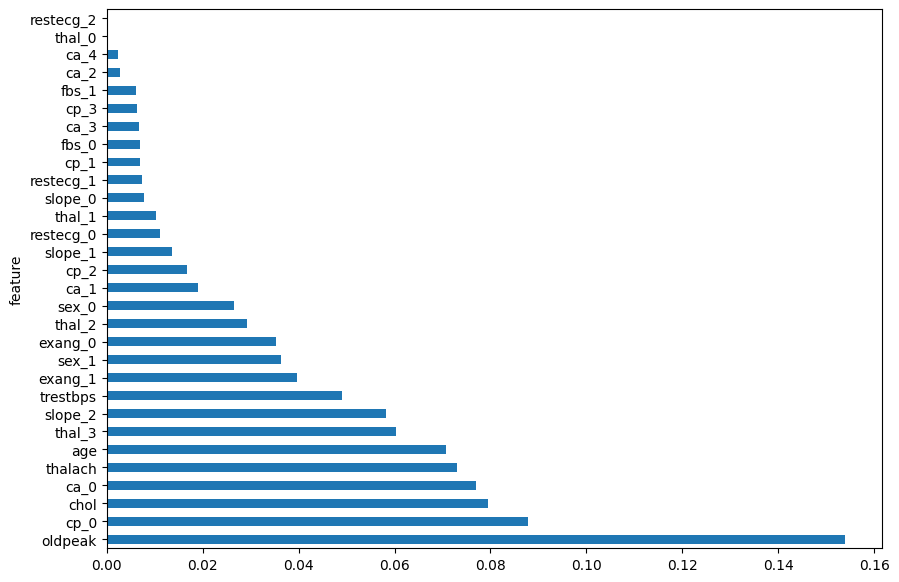

In [41]:
# Define the parameters for RandomizedSearchCV
rf_param_grid = {
    'n_estimators' : range(1, 1000, 10),
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(param_distributions=rf_param_grid,
                               estimator=rf, scoring="accuracy",
                               verbose=0, n_iter=100, cv=4)

# Fit the model on the training data
rf_random.fit(X_train, y_train)

# Get the best parameters
best_params = rf_random.best_params_
print(f'Best Parameters: {best_params}')

# Get the best model
best_rf_model = rf_random.best_estimator_

# Calculate feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for feature importances
fi = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})

# Sort features by importance
fi = fi.sort_values(by='importance', ascending=False)

# Plot feature importances
fi.plot('feature', 'importance', 'barh', figsize=(10,7), legend=False)


For our random forest model, thalasemia is the most critical feature by a significant margin compared to the rest. This might guide us for the selection of future datasets and the data gathering stage during the creation of such datasets. Moreover,r looking at the top of the Y-axis, we see those specific categories of ca, fbs, and restecg are not as important as the other categories of the same feature. Identifying these would also help curate a more comprehensive and valuable dataset for heart disease detection.

# **Artificial Neural Networks**

ANNs could give a comparable performance with only a few layers of linear units. Using the Sequential model class of Keras, we build a simple ANN with four hidden layers as follows:

In [43]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dropout
model = tf.keras.Sequential([
    layers.Dense(20, activation= 'relu', name='dense1'),
    Dropout(0.2),
    layers.Dense(25, activation='relu', name='dense2'),
    layers.Dense(45, activation='relu', name='dense3'),
    Dropout(0.5),
    layers.Dense(10, activation='relu', name='dense4'),
    layers.Dense(2, activation='sigmoid', name='fc1'),
])

Moreover, SparseCategoricalCrossentropy loss is often the best choice for binary classification problems like ours. Training the ANN for 100 epochs with a batch size of 32, we have a training accuracy of 95% and a test accuracy of 85.2%.

In [46]:
from tensorflow import keras
model.compile(
    loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

In [47]:
model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=2)
model.evaluate(X_test, y_test, batch_size=32, verbose=2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8/8 - 1s - loss: 0.6950 - accuracy: 0.4959 - 1s/epoch - 163ms/step
Epoch 2/100
8/8 - 0s - loss: 0.6735 - accuracy: 0.5620 - 34ms/epoch - 4ms/step
Epoch 3/100
8/8 - 0s - loss: 0.6394 - accuracy: 0.5909 - 33ms/epoch - 4ms/step
Epoch 4/100
8/8 - 0s - loss: 0.6341 - accuracy: 0.6157 - 29ms/epoch - 4ms/step
Epoch 5/100
8/8 - 0s - loss: 0.6197 - accuracy: 0.6116 - 30ms/epoch - 4ms/step
Epoch 6/100
8/8 - 0s - loss: 0.6069 - accuracy: 0.6529 - 31ms/epoch - 4ms/step
Epoch 7/100
8/8 - 0s - loss: 0.5830 - accuracy: 0.7066 - 30ms/epoch - 4ms/step
Epoch 8/100
8/8 - 0s - loss: 0.6121 - accuracy: 0.7190 - 35ms/epoch - 4ms/step
Epoch 9/100
8/8 - 0s - loss: 0.5678 - accuracy: 0.7397 - 32ms/epoch - 4ms/step
Epoch 10/100
8/8 - 0s - loss: 0.5589 - accuracy: 0.7479 - 30ms/epoch - 4ms/step
Epoch 11/100
8/8 - 0s - loss: 0.5459 - accuracy: 0.7562 - 32ms/epoch - 4ms/step
Epoch 12/100
8/8 - 0s - loss: 0.5257 - accuracy: 0.7562 - 30ms/epoch - 4ms/step
Epoch 13/100
8/8 - 0s - loss: 0.5042 - accuracy: 0.7686 - 30m

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


[0.4846719205379486, 0.8524590134620667]

*  It runs for 100 epochs (iterations over the entire training dataset).
*  The batch size is set to 32, meaning that the model's parameters are updated after processing 32 samples.
*  The training process took a total of 8 seconds. Each epoch took around 1 second to complete.
*  The test loss is approximately 0.485, and the test accuracy is approximately 85.2%.
*  The model seems to be overfitting to some extent, as the training accuracy is much higher (around 95%) than the test accuracy (around 85%).

After trying five different machine learning techniques to predict heart disease, it is clear that K-nearest neighbors perform the best on our UCI dataset. However, feature engineering and hyperparameter tuning in other models can also yield comparable results. Moreover, we can extend the dataset, using more samples and more key features such as the one found in the UCI extended and combined dataset and try out these models again. Data availability remains a major problem for modernizing health care systems using artificial intelligence, especially clean, structured datasets for supervised learning.

Nevertheless, after experimentation in Python, we can say that machine learning can significantly help detect the presence and future risk of heart attacks, strokes, coronary artery disease, and other heart diseases.